In [1]:
import seaborn as sns
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport data
%aimport tf_deep

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder


/home/lpp/Desktop/deep-learning/logs


In [2]:
X, Y = data.sample_gmm_2d(5, 2, 10)
model = LogisticRegression(C=1e5)
model.fit(X, Y.ravel())

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

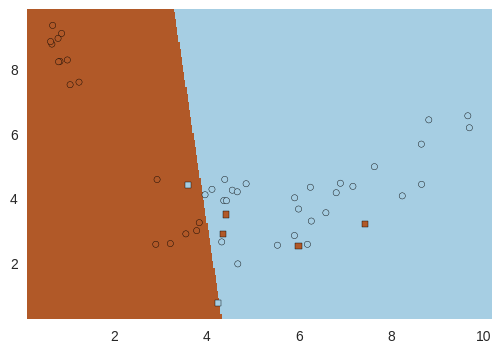

In [3]:
data.graph_data_pred(X, Y, model)

In [4]:
X, Y = data.sample_gmm_2d(4, 2, 40)
oh = OneHotEncoder(sparse=False)
oh.fit(Y)
Yoh = oh.transform(Y)

             precision    recall  f1-score   support

          0       0.65      0.62      0.64        80
          1       0.64      0.66      0.65        80

avg / total       0.64      0.64      0.64       160

confusion matrix
 [[50 30]
 [27 53]]


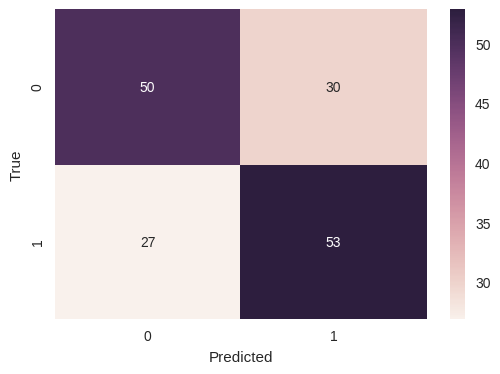

In [5]:
l = [2,2]
tflr = tf_deep.TFDeep(l, 0.001)
tflr.train(X, Yoh, 10000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [6]:
Yoh.shape

(160, 2)

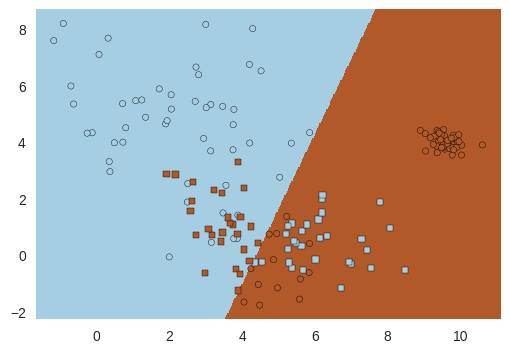

In [7]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

             precision    recall  f1-score   support

          0       0.93      0.88      0.90        80
          1       0.88      0.94      0.91        80

avg / total       0.91      0.91      0.91       160

confusion matrix
 [[70 10]
 [ 5 75]]


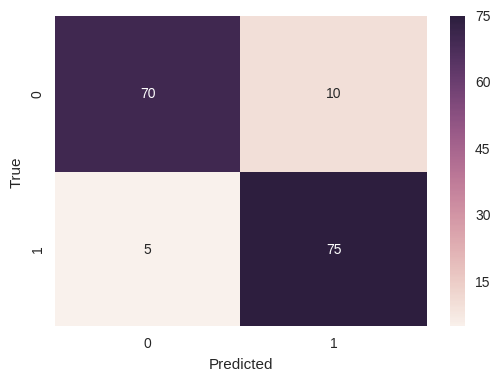

In [8]:
l = [2,10, 2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

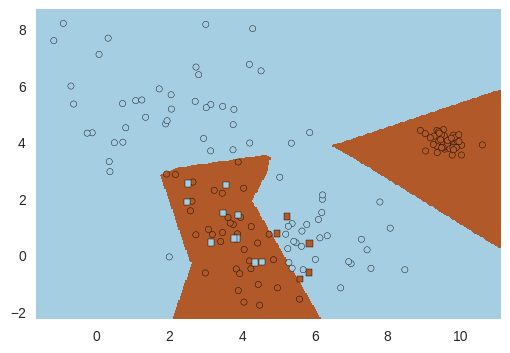

In [9]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

             precision    recall  f1-score   support

          0       0.95      0.94      0.94        80
          1       0.94      0.95      0.94        80

avg / total       0.94      0.94      0.94       160

confusion matrix
 [[75  5]
 [ 4 76]]


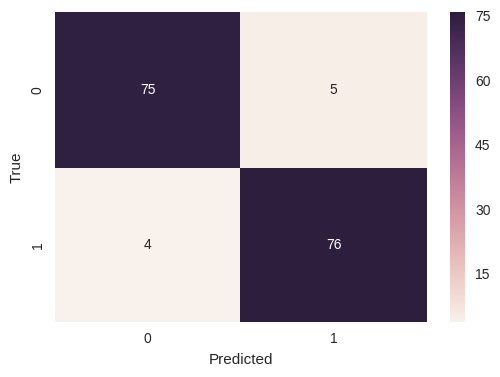

In [10]:
l = [2,10, 10, 2]
tflr = tf_deep.TFDeep(l, 0.001)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

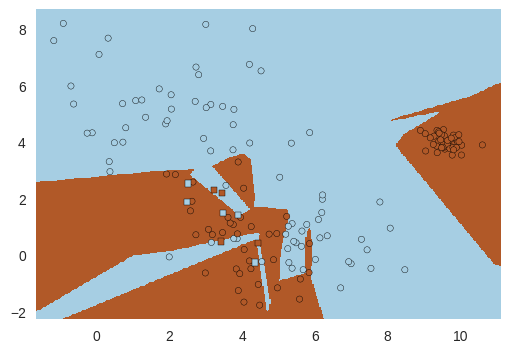

In [11]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

# 5.3.b

In [12]:
X, Y = data.sample_gmm_2d(6, 2, 10)
oh = OneHotEncoder(sparse=False)
oh.fit(Y)
Yoh = oh.transform(Y)

             precision    recall  f1-score   support

          0       0.76      0.88      0.81        40
          1       0.64      0.45      0.53        20

avg / total       0.72      0.73      0.72        60

confusion matrix
 [[35  5]
 [11  9]]


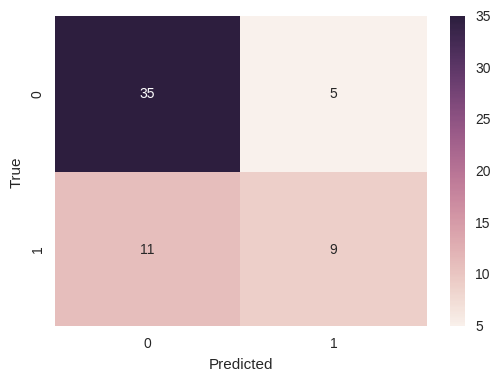

In [13]:
l = [2,2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

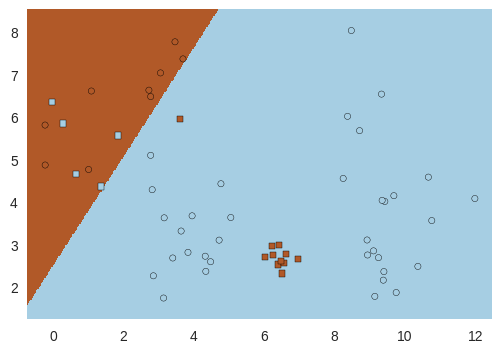

In [14]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

/usr/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.95      0.93      0.94        40
          1       0.86      0.90      0.88        20

avg / total       0.92      0.92      0.92        60

confusion matrix
 [[37  3]
 [ 2 18]]


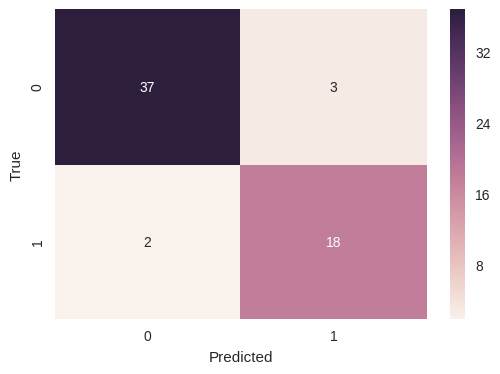

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
clf.fit(X, Y)
ypp = clf.predict(X)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

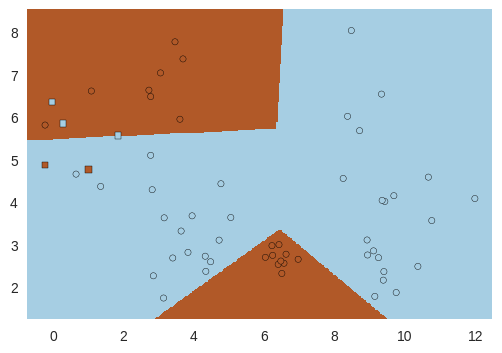

In [ ]:
data.graph_data_pred(X, Y, clf)

In [ ]:
l = [2,10, 2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

In [ ]:
l = [2,10, 10, 2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

In [ ]:
X, Y = data.sample_gmm_2d(6, 2, 10)
oh = OneHotEncoder(sparse=False)
oh.fit(Y)
Yoh = oh.transform(Y)

l = [2,10, 10, 2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, Y.ravel())
data.graph_data_pred(X, Y, model)